<img src='111.jpg'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e8/sample_submission.csv
/kaggle/input/playground-series-s3e8/train.csv
/kaggle/input/playground-series-s3e8/test.csv


In [2]:
#Tablosal Değerli Taş Fiyat Veri Kümesiyle Regresyon


In [3]:
df1= pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')
df1

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [4]:
df2= pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')
df2

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24
...,...,...,...,...,...,...,...,...,...,...
129045,322618,0.72,Ideal,D,VVS2,62.0,56.0,5.75,5.78,3.57
129046,322619,0.70,Premium,D,SI1,59.6,62.0,5.77,5.74,3.43
129047,322620,1.01,Premium,G,VVS2,62.3,58.0,6.44,6.41,4.01
129048,322621,1.35,Ideal,D,I1,62.0,56.0,7.05,7.08,4.38


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df1.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129050 entries, 0 to 129049
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       129050 non-null  int64  
 1   carat    129050 non-null  float64
 2   cut      129050 non-null  object 
 3   color    129050 non-null  object 
 4   clarity  129050 non-null  object 
 5   depth    129050 non-null  float64
 6   table    129050 non-null  float64
 7   x        129050 non-null  float64
 8   y        129050 non-null  float64
 9   z        129050 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.8+ MB


In [8]:
df2.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [9]:
df1.shape,df2.shape

#df2  df1 e göre 1 tane eksik. bziden bunu tahmin etmemiz isteniyor

((193573, 11), (129050, 10))

In [10]:
df=pd.concat([df1,df2])

In [11]:
df.info()

#ikisini birleştirdik ve tek bir df oldu

<class 'pandas.core.frame.DataFrame'>
Index: 322623 entries, 0 to 129049
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       322623 non-null  int64  
 1   carat    322623 non-null  float64
 2   cut      322623 non-null  object 
 3   color    322623 non-null  object 
 4   clarity  322623 non-null  object 
 5   depth    322623 non-null  float64
 6   table    322623 non-null  float64
 7   x        322623 non-null  float64
 8   y        322623 non-null  float64
 9   z        322623 non-null  float64
 10  price    193573 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 29.5+ MB


In [12]:
df.isnull().sum()

id              0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
x               0
y               0
z               0
price      129050
dtype: int64

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0
...,...,...,...,...,...,...,...,...,...,...,...
129045,322618,0.72,Ideal,D,VVS2,62.0,56.0,5.75,5.78,3.57,NaN
129046,322619,0.70,Premium,D,SI1,59.6,62.0,5.77,5.74,3.43,NaN
129047,322620,1.01,Premium,G,VVS2,62.3,58.0,6.44,6.41,4.01,NaN
129048,322621,1.35,Ideal,D,I1,62.0,56.0,7.05,7.08,4.38,NaN


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [16]:
df.corr(numeric_only=True)

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.002076,0.000901,0.003556,-0.001977,-0.002063,-0.002003,-0.001392
carat,-0.002076,1.000000,0.026491,0.225726,0.980528,0.980089,0.972880,0.943396
depth,0.000901,0.026491,1.000000,-0.233942,-0.011967,-0.012801,0.080541,0.001880
table,0.003556,0.225726,-0.233942,1.000000,0.237945,0.233617,0.211627,0.174915
x,-0.001977,0.980528,-0.011967,0.237945,1.000000,0.999126,0.988376,0.901004
y,-0.002063,0.980089,-0.012801,0.233617,0.999126,1.000000,0.988223,0.901033
z,-0.002003,0.972880,0.080541,0.211627,0.988376,0.988223,1.000000,0.893037
price,-0.001392,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


In [17]:
df["cut"].value_counts(dropna=False)

cut
Ideal        153677
Premium       83408
Very Good     63034
Good          19176
Fair           3328
Name: count, dtype: int64

In [18]:
df["color"].value_counts(dropna=False)

color
G    73952
E    59955
F    57025
H    51375
D    40453
I    29199
J    10664
Name: count, dtype: int64

In [19]:
df["clarity"].value_counts(dropna=False)

clarity
SI1     88608
VS2     80228
VS1     51188
SI2     50651
VVS2    26079
VVS1    17955
IF       7010
I1        904
Name: count, dtype: int64

In [20]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price    1.000000
carat    0.943396
y        0.901033
x        0.901004
z        0.893037
table    0.174915
depth    0.001880
id       0.001392
Name: price, dtype: float64

In [42]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0
...,...,...,...,...,...,...,...,...,...,...,...
129045,322618,0.72,Ideal,D,VVS2,62.0,56.0,5.75,5.78,3.57,NaN
129046,322619,0.70,Premium,D,SI1,59.6,62.0,5.77,5.74,3.43,NaN
129047,322620,1.01,Premium,G,VVS2,62.3,58.0,6.44,6.41,4.01,NaN
129048,322621,1.35,Ideal,D,I1,62.0,56.0,7.05,7.08,4.38,NaN


In [44]:
x=df1[['carat', 'depth', 'table', 'x', 'y',
       'z']]

In [45]:
x

,carat,depth,table,x,y,z
0,1.52,62.2,58.0,7.27,7.33,4.55
1,2.03,62.0,58.0,8.06,8.12,5.05
2,0.70,61.2,57.0,5.69,5.73,3.50
3,0.32,61.6,56.0,4.38,4.41,2.71
4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67
193569,0.70,60.3,58.0,5.75,5.77,3.47
193570,0.73,63.1,57.0,5.72,5.75,3.62
193571,0.34,62.9,55.0,4.45,4.49,2.81


In [29]:
x=pd.get_dummies(x,drop_first=True)

#yazıları sayıya çevirdik
#df yerine x kullandık. df nin orjinali bozulmasın kalsın diye 

In [46]:
x

,carat,depth,table,x,y,z
0,1.52,62.2,58.0,7.27,7.33,4.55
1,2.03,62.0,58.0,8.06,8.12,5.05
2,0.70,61.2,57.0,5.69,5.73,3.50
3,0.32,61.6,56.0,4.38,4.41,2.71
4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67
193569,0.70,60.3,58.0,5.75,5.77,3.47
193570,0.73,63.1,57.0,5.72,5.75,3.62
193571,0.34,62.9,55.0,4.45,4.49,2.81


In [48]:
x

,carat,depth,table,x,y,z
0,1.52,62.2,58.0,7.27,7.33,4.55
1,2.03,62.0,58.0,8.06,8.12,5.05
2,0.70,61.2,57.0,5.69,5.73,3.50
3,0.32,61.6,56.0,4.38,4.41,2.71
4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67
193569,0.70,60.3,58.0,5.75,5.77,3.47
193570,0.73,63.1,57.0,5.72,5.75,3.62
193571,0.34,62.9,55.0,4.45,4.49,2.81


In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   193573 non-null  float64
 1   depth   193573 non-null  float64
 2   table   193573 non-null  float64
 3   x       193573 non-null  float64
 4   y       193573 non-null  float64
 5   z       193573 non-null  float64
dtypes: float64(6)
memory usage: 8.9 MB


In [50]:
y=df1[['price']]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [53]:
lr=LinearRegression()
gb=GradientBoostingRegressor()
et=ExtraTreeRegressor()
r=Ridge()
l=Lasso()

In [54]:
import tensorflow as tf

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [58]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=20,verbose=1)

Epoch 1/100
7743/7743 [==============================] - 24s 3ms/step - loss: 1386590.8750 - val_loss: 1331379.6250
Epoch 2/100
7743/7743 [==============================] - 21s 3ms/step - loss: 1383254.0000 - val_loss: 1352301.0000
Epoch 3/100
7743/7743 [==============================] - 21s 3ms/step - loss: 1383271.1250 - val_loss: 1390154.5000
Epoch 4/100
7743/7743 [==============================] - 22s 3ms/step - loss: 1379878.1250 - val_loss: 1343214.3750
Epoch 5/100
7743/7743 [==============================] - 24s 3ms/step - loss: 1381165.8750 - val_loss: 1336452.7500
Epoch 6/100
7743/7743 [==============================] - 22s 3ms/step - loss: 1378624.7500 - val_loss: 1333868.5000
Epoch 7/100
7743/7743 [==============================] - 23s 3ms/step - loss: 1378813.1250 - val_loss: 1445188.6250
Epoch 8/100
7743/7743 [==============================] - 25s 3ms/step - loss: 1375297.6250 - val_loss: 1370638.0000
Epoch 9/100
7743/7743 [==============================] - 22s 3ms/step - 

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                133       
                                                                 
 dense_7 (Dense)             (None, 19)                380       
                                                                 
 dense_8 (Dense)             (None, 19)                380       
                                                                 
 dense_9 (Dense)             (None, 19)                380       
                                                                 
 dense_10 (Dense)            (None, 19)                380       
                                                                 
 dense_11 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1673 (6.54 KB)
Trainable params: 1673 (6

In [60]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

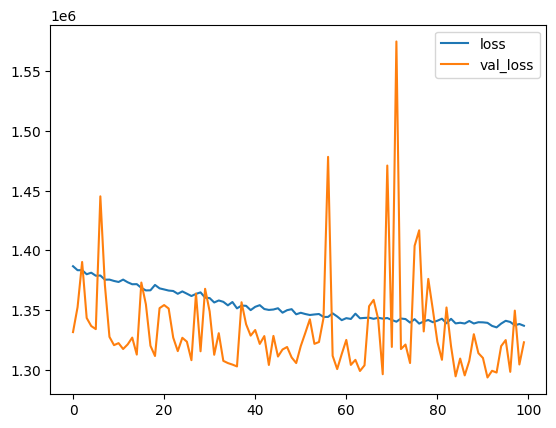

In [61]:
loss_df.plot()

In [62]:
tahmin=model.predict(x_test)

1210/1210 [==============================] - 1s 1ms/step


In [63]:
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
r2_score(y_test,tahmin)

0.9181406265182164

In [65]:
mean_squared_error(y_test,tahmin)**.5

1150.1359676334919